In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy import optimize as opt

In [2]:
t = np.arange(600) + 1850


In [3]:
def gauss(t,a,b,c):
    y = a*np.exp(-((t-b)**2.)/(2*c**2))
    return(y)

def gaussderiv(t,a,b,c):
    y = (a*(b-t)*np.exp(-((b-t)**2.)/(2*c**2.)))/(c**2.)
    return(y)

def gaussderiv_1000pg(t,b,c):
    y = (1000.*(b-t)*np.exp(-((b-t)**2.)/(2*c**2.)))/(c**2.)
    return(y)

def gaussderiv_750pg(t,b,c):
    y = (750.*(b-t)*np.exp(-((b-t)**2.)/(2*c**2.)))/(c**2.)
    return(y)

In [4]:
###  ingest data on fossil fuel co2 emissions and put into units of Pg C / yr
my_data = genfromtxt('global_1751_2017.csv', delimiter=',', skip_header=5)
years_cdiac = my_data[:,0]
emissions = my_data[:,1] * 1e-3

In [5]:
### calculate best-fit curves for the emission data, assuming
### that the form of the curve is the derivative of a gaussian
### first allow three parameters (peak cumulative emissions, 
### time fo emissions, width of curve)
### then retry assuming an integrated curve of 1000 Pg C or 750 Pg C

a = opt.curve_fit(gaussderiv,years_cdiac,emissions, p0=(10,2050,50))
b = opt.curve_fit(gaussderiv_1000pg,years_cdiac,emissions, p0=(2050,50))
c = opt.curve_fit(gaussderiv_750pg,years_cdiac,emissions, p0=(2050,50))


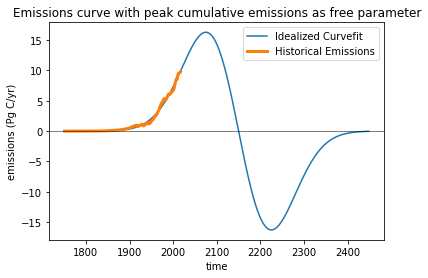

In [6]:
y = gaussderiv(t,a[0][0],a[0][1],a[0][2])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative emissions as free parameter')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')


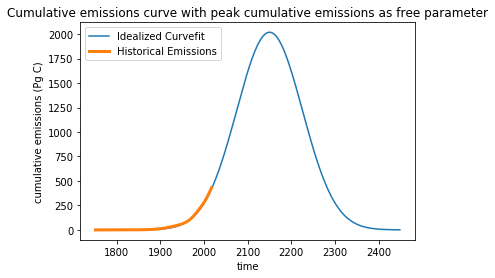

In [7]:
y = gauss(t,a[0][0],a[0][1],a[0][2])
plt.plot(t,y)
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('Cumulative emissions curve with peak cumulative emissions as free parameter')
plt.legend(('Idealized Curvefit','Historical Emissions'))


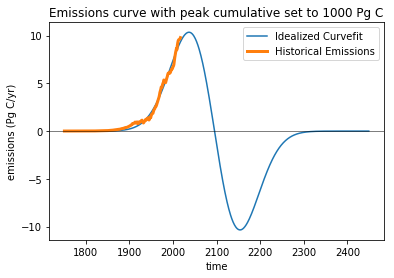

In [8]:
y = gaussderiv(t,1000,b[0][0],b[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')


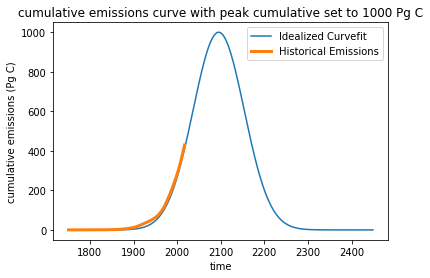

In [9]:
y = gauss(t,1000,b[0][0],b[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('cumulative emissions curve with peak cumulative set to 1000 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))


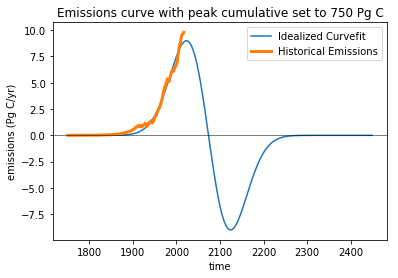

In [10]:
y = gaussderiv(t,750,c[0][0],c[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions, linewidth=3.)
plt.xlabel('time')
plt.ylabel('emissions (Pg C/yr)')
plt.title ('Emissions curve with peak cumulative set to 750 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))
plt.axhline(y=0, linewidth=0.5, color='black')


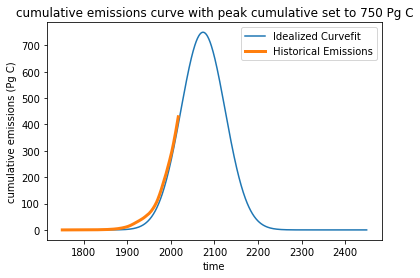

In [11]:
y = gauss(t,750,c[0][0],c[0][1])
plt.plot(t,y)
plt.plot(years_cdiac,emissions.cumsum(), linewidth=3.)
plt.xlabel('time')
plt.ylabel('cumulative emissions (Pg C)')
plt.title ('cumulative emissions curve with peak cumulative set to 750 Pg C')
plt.legend(('Idealized Curvefit','Historical Emissions'))


In [12]:
a

(array([2018.66395918, 2150.1800967 ,   75.14013574]),
 array([[6.38610181e+04, 2.50159280e+03, 6.69830805e+02],
        [2.50159280e+03, 9.86428215e+01, 2.66358920e+01],
        [6.69830805e+02, 2.66358920e+01, 7.28675720e+00]]))

In [13]:
b

(array([2095.25489269,   58.57040735]), array([[0.2474225 , 0.1664713 ],
        [0.1664713 , 0.15230273]]))

In [14]:
c

(array([2073.73141688,   50.63562655]), array([[0.23201517, 0.13597773],
        [0.13597773, 0.14203289]]))